In [14]:
import boto3
import datetime
import os
import slack

client = slack.WebClient('xxxxxxx')
cw = boto3.client('cloudwatch')

def ret_met(id1,metric):
    response = cw.get_metric_statistics(
            Period=300,
            StartTime=datetime.datetime.utcnow() - datetime.timedelta(seconds=60000),
            EndTime=datetime.datetime.utcnow(),
            MetricName=metric,
            Namespace='AWS/EC2',
            Statistics=['Average'],
            Dimensions=[{'Name':'InstanceId', 'Value':id1}]
            )

    data = response['Datapoints']
    li=[]
    for i in data:
        li.append((i['Average'],i['Timestamp']))

    li = sorted(li, key = lambda x: x[1])
    return li
    # print(li)
    # for i in li:
    # 	print(i)

In [15]:
import matplotlib.pyplot as plt

def display(id,metric):
    response = cw.list_metrics(Namespace='AWS/EC2', Dimensions=[{'Name':'InstanceId', 'Value':instance_id}])['Metrics']
    metrics = [i['MetricName'] for i in response]
    for i in metrics:
        print(i)

    li = ret_met(instance_id,metric)
    fig=plt.figure(figsize=(15,5), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot([i[1] for i in li],[i[0] for i in li])
    plt.ylabel(metric)
    plt.show()

def send_message(message):
    response = client.chat_postMessage(
        channel='USFJDCSJK',
        text=message)
    assert response["ok"]
    assert response["message"]["text"] == message

NetworkPacketsIn
NetworkPacketsOut
CPUUtilization
MetadataNoToken
NetworkIn
NetworkOut
DiskReadBytes
DiskWriteBytes
DiskReadOps
DiskWriteOps
CPUCreditUsage
CPUCreditBalance
CPUSurplusCreditBalance
CPUSurplusCreditsCharged
StatusCheckFailed_System
StatusCheckFailed_Instance
StatusCheckFailed


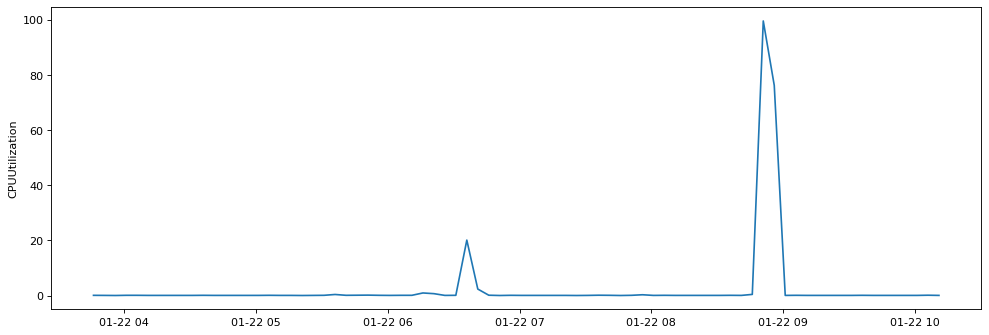

In [16]:
metric = 'CPUUtilization'
instance_id = 'i-0d85b654fab3f772a'

display(instance_id,metric)

In [36]:
def create_ins():
    ec2 = boto3.resource('ec2')
    # create a new EC2 instance
    instances = ec2.create_instances(
         ImageId='ami-04b9e92b5572fa0d1',
         MinCount=1,
         MaxCount=1,
         InstanceType='t2.micro',
         KeyName='naman'
     )

In [34]:
li = ret_met(instance_id,metric)
us = li[-1][0]
try:
    if(us>40):
        send_message("emergency : "+str(us))
        create_ins()
except:
    pass